In [2]:
import pandas as pd
import os

data_dir = '../data/raw/yfinance_data'
stock_dfs = {}

for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        ticker = file.replace('.csv', '')
        df = pd.read_csv(os.path.join(data_dir, file), parse_dates=['Date'])
        df.set_index('Date', inplace=True)
        stock_dfs[ticker] = df

In [3]:
for ticker, df in stock_dfs.items():
    df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
    df.sort_index(inplace=True)

In [5]:
import talib

df = stock_dfs['AAPL_historical_data']
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_signal'] = macdsignal

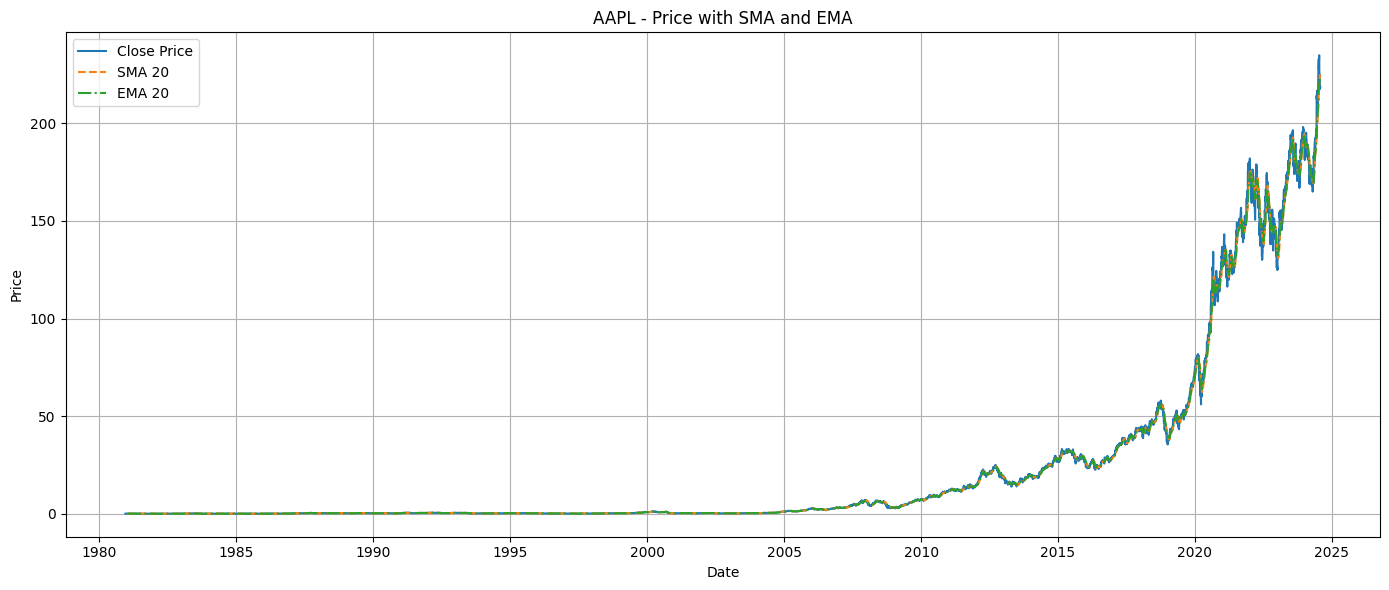

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df.index, df['EMA_20'], label='EMA 20', linestyle='-.')
plt.title('AAPL - Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
for ticker, df in stock_dfs.items():
    df.to_csv(f'../data/processed/{ticker}_with_indicators.csv')